In [1]:
# Import libraries 
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
import imutils #import imutils

In [2]:
# Define our imshow function 
def imshow(title = "Image", image = None, size = 16):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [10]:
#Adjus HSV
import cv2
import numpy as np
from tkinter import *

def update_mask():
    # Get the current values from sliders
    lower_hue_val = lower_hue.get()
    upper_hue_val = upper_hue.get()

    lower_sat_val = lower_sat.get()
    upper_sat_val = upper_sat.get()

    lower_val_val = lower_val.get()
    upper_val_val = upper_val.get()

    lower_red = np.array([lower_hue_val, lower_sat_val, lower_val_val])
    upper_red = np.array([upper_hue_val, upper_sat_val, upper_val_val])

    mask = cv2.inRange(img_hsv, lower_red, upper_red)

    # Perform Bitwise AND on mask and our original frame
    res = cv2.bitwise_and(image, image, mask=mask)
    cv2.imshow('res', res)

def on_slider_change(val):
    update_mask()

# Load your image
image = cv2.imread("/home/nont/Documents/DL-FOR-COMPUTER-VISION/week03_2/Count_Egg/egg1.jpeg")
image = imutils.resize(image, width=700, height= 300)
img_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Create a simple GUI with sliders
root = Tk()
root.title("HSV Range Adjuster")

# Hue sliders
lower_hue = Scale(root, from_=0, to=180, orient=HORIZONTAL, label="Lower Hue", command=on_slider_change)
lower_hue.set(0)
lower_hue.pack()

upper_hue = Scale(root, from_=0, to=180, orient=HORIZONTAL, label="Upper Hue", command=on_slider_change)
upper_hue.set(40)
upper_hue.pack()

# Saturation sliders
lower_sat = Scale(root, from_=0, to=255, orient=HORIZONTAL, label="Lower Saturation", command=on_slider_change)
lower_sat.set(40)
lower_sat.pack()

upper_sat = Scale(root, from_=0, to=255, orient=HORIZONTAL, label="Upper Saturation", command=on_slider_change)
upper_sat.set(255)
upper_sat.pack()

# Value sliders
lower_val = Scale(root, from_=0, to=255, orient=HORIZONTAL, label="Lower Value", command=on_slider_change)
lower_val.set(70)
lower_val.pack()

upper_val = Scale(root, from_=0, to=255, orient=HORIZONTAL, label="Upper Value", command=on_slider_change)
upper_val.set(255)
upper_val.pack()

update_mask()  # Initial mask update

# Start the GUI event loop
root.mainloop()

cv2.waitKey(0)
cv2.destroyAllWindows()

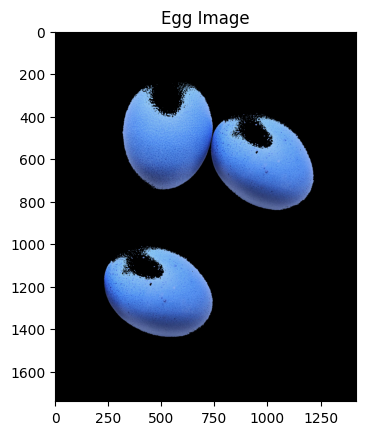

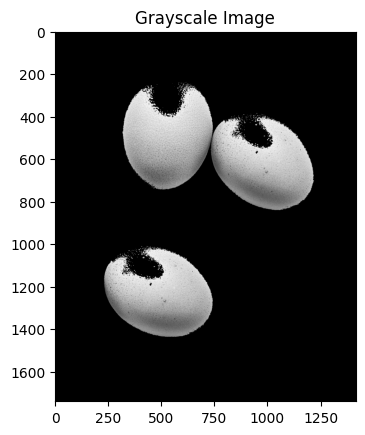

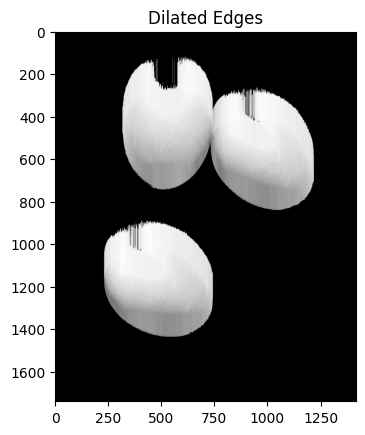

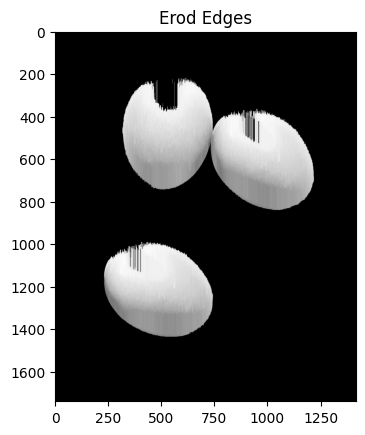

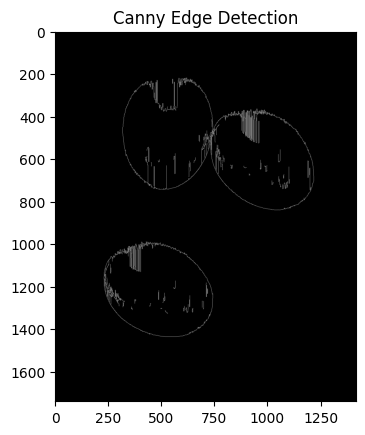

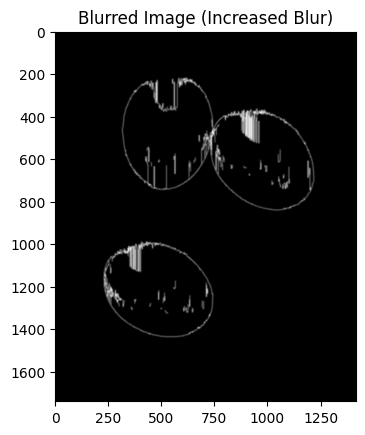

Eggs in the image: 3


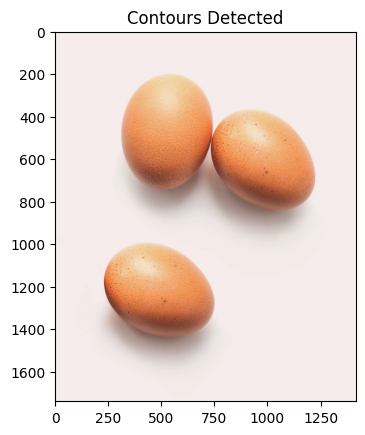

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread("/home/nont/Documents/DL-FOR-COMPUTER-VISION/week03_2/Count_Egg/egg1.jpeg")
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define lower and upper bounds for brown color in HSV
lower_brown = np.array([0, 101, 0]) # Lower threshold for brown color
upper_brown = np.array([180, 255, 255])  # Upper threshold for brown color

# Create a mask to isolate brown color range
mask = cv2.inRange(hsv, lower_brown, upper_brown)

# Apply the mask to the original image
brown = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(brown, cmap='gray')
plt.title('Egg Image')
plt.show()

gray = cv2.cvtColor(brown, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.show()

# Dilate the edges (optional, adjust parameters as needed)
dilated = cv2.dilate(gray, (6, 6), anchor=(0,0),iterations=120)

# Display the dilated image
plt.imshow(dilated, cmap='gray')
plt.title('Dilated Edges')
plt.show()

# Erod the edges (optional, adjust parameters as needed)
Erode = cv2.erode(dilated, (6, 6), iterations=100)

# Erod the blurred image
plt.imshow(Erode, cmap='gray')
plt.title('Erod Edges')
plt.show()

# Apply Canny edge detection
canny = cv2.Canny(Erode, 30, 80)

# Display the edges detected
plt.imshow(canny, cmap='gray')
plt.title('Canny Edge Detection')
plt.show()

# Apply Gaussian blur with increased kernel size
blur = cv2.GaussianBlur(canny, (15, 15), 0)

# Display the blurred image
plt.imshow(blur, cmap='gray')
plt.title('Blurred Image (Increased Blur)')
plt.show()

# Find contours
(cnt, _) = cv2.findContours(
    dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Draw contours on the original image
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

# Print the number of eggs found
print("Eggs in the image:", len(cnt))

# Display the image with contours
plt.imshow(rgb)
plt.title('Contours Detected')
plt.show()

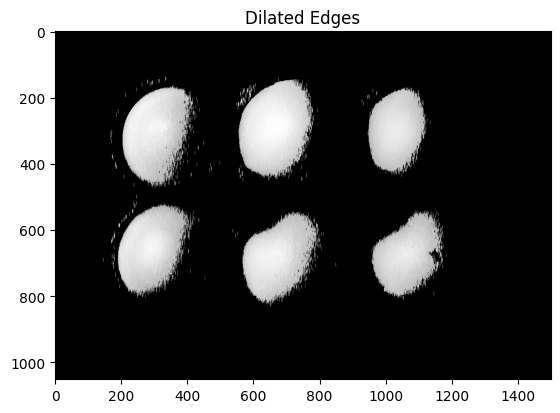

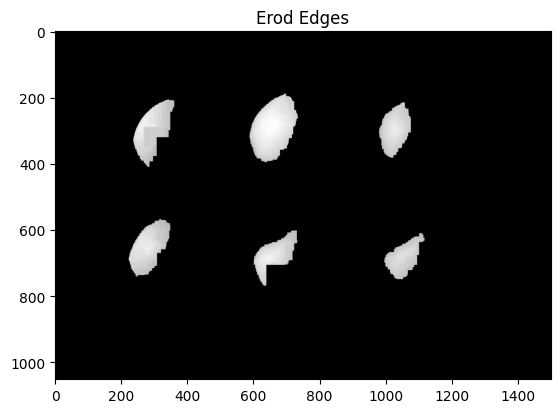

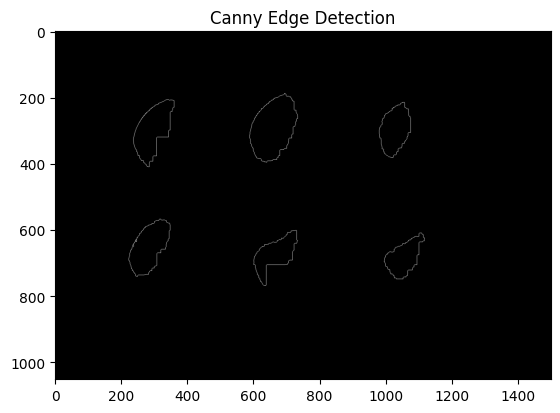

Eggs in the image: 6


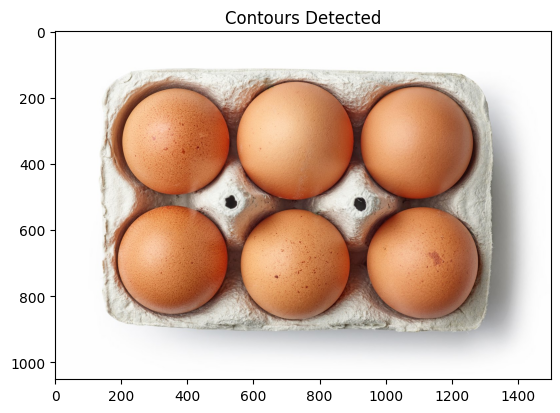

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread("/home/nont/Documents/DL-FOR-COMPUTER-VISION/week03_2/Count_Egg/egg2.jpeg")
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  #convert to hsv
# Range for lower red
lower_red = np.array([8,71,225])
upper_red = np.array([58,255,255])
mask = cv2.inRange(hsv, lower_red, upper_red)


# Apply the mask to the original image
brown = cv2.bitwise_and(image.copy(), image.copy(), mask=mask)

gray = cv2.cvtColor(brown, cv2.COLOR_BGR2GRAY)

# Dilate the edges (optional, adjust parameters as needed)
dilated = cv2.dilate(gray, (30, 30), anchor=(0,0),iterations=10)

# Display the dilated image
plt.imshow(dilated, cmap='gray')
plt.title('Dilated Edges')
plt.show()


Erode = cv2.erode(dilated, np.ones((60, 60), np.uint8), iterations=1)
plt.imshow(Erode, cmap='gray')
plt.title('Erod Edges')
plt.show()
# plt.imshow(Erode, cmap='gray')

# Apply Canny edge detection
canny = cv2.Canny(Erode, 50, 200)

# Display the edges detected
plt.imshow(canny, cmap='gray')
plt.title('Canny Edge Detection')
plt.show()

# Find contours
(cnt, _) = cv2.findContours(
    canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Draw contours on the original image
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

# Print the number of eggs found
print("Eggs in the image:", len(cnt))

# Display the image with contours
plt.imshow(rgb)
plt.title('Contours Detected')
plt.show()

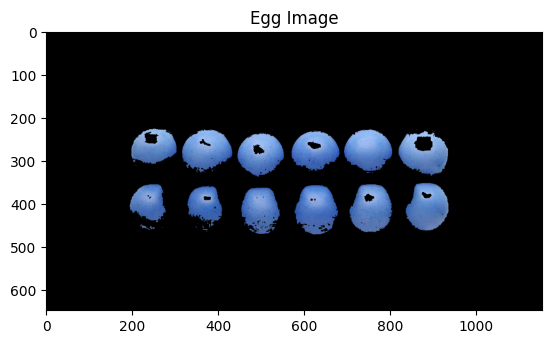

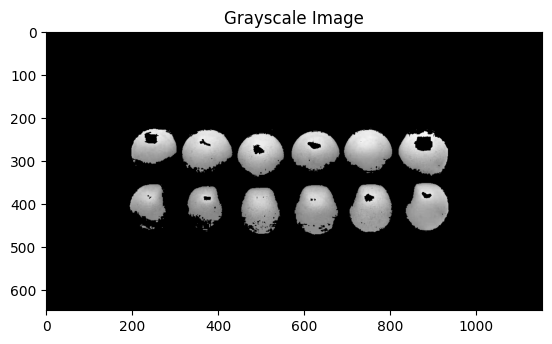

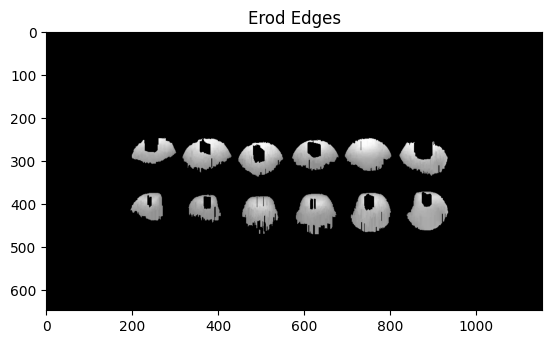

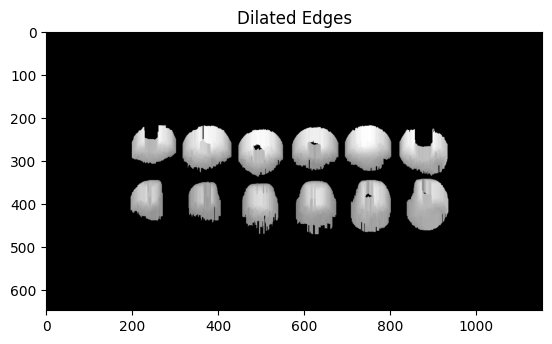

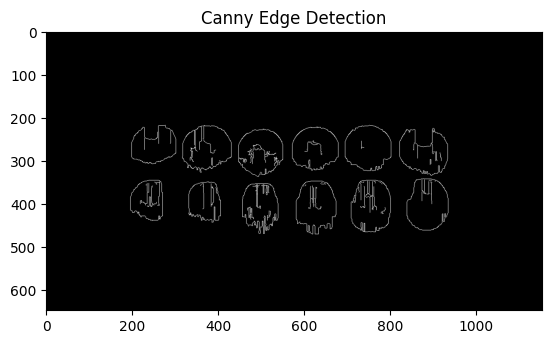

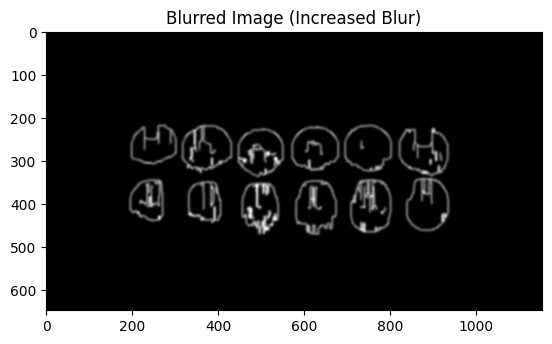

Eggs in the image: 12


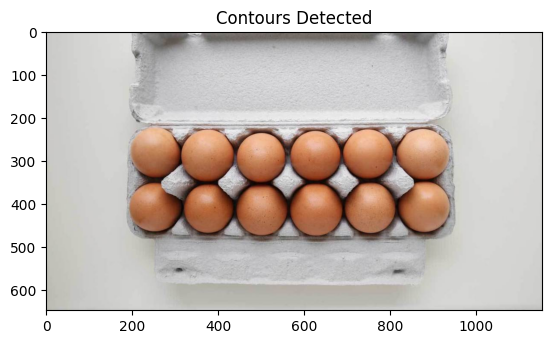

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread("/home/nont/Documents/DL-FOR-COMPUTER-VISION/week03_2/Count_Egg/egg3.jpeg")
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define lower and upper bounds for brown color in HSV
lower_brown = np.array([0, 85, 165]) # Lower threshold for brown color
upper_brown = np.array([180, 255, 255])  # Upper threshold for brown color

# Create a mask to isolate brown color range
mask = cv2.inRange(hsv, lower_brown, upper_brown)

# Apply the mask to the original image
brown = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(brown, cmap='gray')
plt.title('Egg Image')
plt.show()

gray = cv2.cvtColor(brown, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.show()

# Erod the edges (optional, adjust parameters as needed)
Erode = cv2.erode(gray, (15, 15), iterations=20)

# Erod the blurred image
plt.imshow(Erode, cmap='gray')
plt.title('Erod Edges')
plt.show()

# Dilate the edges (optional, adjust parameters as needed)
dilated = cv2.dilate(Erode, (15, 15), anchor=(0,0),iterations=30)

# Display the dilated image
plt.imshow(dilated, cmap='gray')
plt.title('Dilated Edges')
plt.show()

# Apply Canny edge detection
canny = cv2.Canny(dilated, 30, 80)

# Display the edges detected
plt.imshow(canny, cmap='gray')
plt.title('Canny Edge Detection')
plt.show()

# Apply Gaussian blur with increased kernel size
blur = cv2.GaussianBlur(canny, (15, 15), 0)

# Display the blurred image
plt.imshow(blur, cmap='gray')
plt.title('Blurred Image (Increased Blur)')
plt.show()

# Find contours
(cnt, _) = cv2.findContours(
    dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Draw contours on the original image
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 2)

# Print the number of eggs found
print("Eggs in the image:", len(cnt))

# Display the image with contours
plt.imshow(rgb)
plt.title('Contours Detected')
plt.show()